<a href="https://colab.research.google.com/github/dantae74/Reinforcement-Learning/blob/main/03-04-RL-Q-table-in-stochastic-world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모두를 위한 머신러닝에서 가져왔습니다.
## RL - Frozen lake in stochestic(non-deterministic) world 

In [25]:
import time
import gym
import numpy as np
import matplotlib.pyplot as plt

In [13]:
N_ACTIONS = 4
N_STATES = 16

LEARNING_RATE = .5
DISCOUNT_RATE = .98

N_EPISODES = 2000

In [44]:
def main():
    """Main"""
    frozone_lake_env = gym.make("FrozenLake-v0")

    # Initialize table with all zeros
    Q = np.zeros([N_STATES, N_ACTIONS])

    # Set learning parameters

    # create lists to contain total rewards and steps per episode
    rewards = []

    for i in range(N_EPISODES):
        # Reset environment and get first new observation
        state = frozone_lake_env.reset()
        episode_reward = 0
        done = False

        # The Q-Table learning algorithm
        while not done:
            # Choose an action by greedily (with noise) picking from Q table
            noise = np.random.randn(1, N_ACTIONS) / (i + 1)
            action = np.argmax(Q[state, :] + noise)

            # Get new state and reward from environment
            new_state, reward, done, _ = frozone_lake_env.step(action)

            reward = -1 if done and reward < 1 else reward

            # Update Q-Table with new knowledge using learning rate
            Q[state, action] = (1 - LEARNING_RATE) * Q[state, action] + LEARNING_RATE * (reward + DISCOUNT_RATE * np.max(Q[new_state, :]))

            episode_reward += reward
            state = new_state

        rewards.append(episode_reward)



    for i in range(10):
        # Reset environment and get first new observation
        state = frozone_lake_env.reset()
        episode_reward = 0
        done = False

        # The Q-Table learning algorithm
        while not done:
            # Choose an action by greedily (with noise) picking from Q table
            action = np.argmax(Q[state, :])

            # Get new state and reward from environment
            new_state, reward, done, _ = frozone_lake_env.step(action)
            # print_utils.clear_screen()
            # frozone_lake_env.render()
            time.sleep(.1)

            episode_reward += reward
            state = new_state

            if done:
                print("Episode Reward: {}".format(episode_reward))
            #     print_utils.print_result(episode_reward)

        rewards.append(episode_reward)

    print("Score over time: " + str(sum(rewards) / N_EPISODES))
    print("Final Q-Table Values")
    print("LEFT DOWN RIGHT UP")
    print(Q)
    plt.bar(range(len(rewards)), rewards, color="blue")
    plt.show()

    frozone_lake_env.close()

Episode Reward: 1.0
Episode Reward: 1.0
Episode Reward: 0.0
Episode Reward: 0.0
Episode Reward: 0.0
Episode Reward: 0.0
Episode Reward: 1.0
Episode Reward: 1.0
Episode Reward: 1.0
Episode Reward: 1.0
Score over time: 0.362
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.28183696 -0.63862052 -0.62344774 -0.750921  ]
 [-0.93488612 -0.88478899 -0.90752059  0.45812669]
 [-0.74581744 -0.73145345 -0.784186    0.2917105 ]
 [-0.875      -0.875      -0.75        0.18948913]
 [ 0.28256399 -0.875      -0.82500583 -0.86264925]
 [ 0.          0.          0.          0.        ]
 [ 0.0230643  -0.99710367 -1.21642675 -0.99899427]
 [ 0.          0.          0.          0.        ]
 [-0.85327908 -0.78622709 -0.74605293  0.30341455]
 [-0.75        0.33741561 -0.72800864 -0.69281659]
 [ 0.66009233 -0.89230607 -0.91738268 -0.88048736]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.5        -0.59821885  0.83672817 -0.5       ]
 [-0.2018116   0.993892

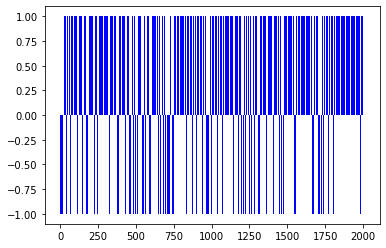

In [45]:
if __name__ == '__main__':
    main()